<a href="https://colab.research.google.com/github/Eswa2020/moringa_school_projects/blob/master/Esther_Wairimu_Kamau_Moringa_Core_Week6_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 6 data science core project-Moringa School Nov 2020

## 1. Defining the Question

### a) Specifying the Question

**Problem statement:**
You have been recruited as a football data analyst in a company -    **Mchezopesa Ltd **and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

**Input**: Home team, Away team, Tournament type (World cup, Friendly, Other)


**Background Information:**

Since their introduction in 1992, the FIFA World Rankings have been the subject of much debate, particularly regarding the calculation procedure and the resulting disparity between generally perceived quality and world ranking of some teams. The perceived flaws in the FIFA system have led to the creation of a number of alternative rankings from football statisticians.

The initial system was very simple, with no weighting for the quality of opponent or importance of a match. The rankings were adapted in 1999 to include weightings based on the importance of the match and the strength of the opponent. A win over a weak opponent resulted in fewer points being awarded than a win over a much stronger one. Further adaptations in 2006 were made to reduce the number of years' results considered from 8 to 4, with greater reliance on matches from within the previous 12 months.

Still, criticisms of the rankings remained, with particular anomalies being noted including: the United States rise to fourth in 2006, to the surprise of even their own players;**Israel's climb to 15th in November 2008**, which surprised the Israeli press and Belgium's rank of world number 1 in November 2015, given that Belgium had only played in one tournament final stage in the past 13 years.



In the 2010s, teams realized the ranking system could be 'gamed', specifically by avoiding playing non-competitive matches, particularly against weaker opponents.This was because the low weighting of friendlies meant that even victories could reduce a team's average score: in other words, a team could win a match and lose points. Prior to the seeding of the 2018 World Cup preliminary draw, 






### b) Defining the Metric for Success
**Approach 1**: Polynomial approach

---



What to train given:

*   **Rank of home team**
*   **Rank of away team**


Tournament type
* Model 1: Predict how many goals the home team scores.

* Model 2: Predict how many goals the away team scores.

**Approach 2**: Logistic approach

---



Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)


### c) Understanding the context 

After a long period testing and analysing the best way to calculate the FIFA/Coca-Cola World Ranking, a new model took effect in August 2018 after approval by the FIFA Council.

This new version developed by FIFA was named "SUM" as it relies on adding/subtracting points won or lost for a game to/from the previous point totals rather than averaging game points over a given time period as in the previous version of the World Ranking.

The points which are added or subtracted are partially determined by the relative strength of the two opponents, including the logical expectation that teams higher in the ranking should fare better against teams lower in the ranking.
Dataset Columns

* Rank
* Country Abbreviation
* Total Points
* Previous Points
* Rank Change
* Average Previous Years Points
* Average Previous Years Points Weighted (50%)
* Average 2 Years Ago Points
* Average 2 Years Ago Points Weighted (30%)
* Average 3 Years Ago Points
* Average 3 Years Ago Points Weighted (20%)
* Confederation
* Date - date of the match
* Home_team - the name of the home team
* Away_team - the name of the away team
* Home_score - full-time home team score including extra time, not including penalty-shootouts
* Away_score - full-time away team score including extra time, not including penalty-shootouts
* Tournament - the name of the tournament
* City - the name of the city/town/administrative unit where the match was played
* Country - the name of the country where the match was played
* Neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

### d) Recording the Experimental Design

The following steps were implemented

1.) Business Understanding, this makes us understand the questions and variables and parameters we are working with.This will help us throughout our anlysis.

2.) Reading the data-we load our datasets into the notebook

3.) Data Exploration,where we check our data for its shape and columns and missing values

4.) Data Wrangling, all data cleaning and preparation is made to data ready for analysis.

5.) EDA(exploratoratory data analysis) here is where we do data analysis and visualization of the data.

6.) Feature Engineering, preparing my data for modeling.

7.) Developing the model.

## 2. Reading the Data

In [5]:
#importing our libraries 

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [6]:
# Loading the Datasets
#since we have 2 datasets
#we have fifa ranking and results 
#
fifa_ranking = pd.read_csv('/content/fifa_ranking.csv')
results= pd.read_csv('/content/results.csv')


## 3. Checking the Data

In [7]:
# Determining the no. of records in our datasets
fifa_ranking.shape


(41361, 16)

In [8]:
results.shape

(40839, 9)

In [9]:
# Previewing the top of our datasets
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [10]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [11]:
# Previewing the bottom of our dataset
fifa_ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
41356,149,Samoa,SAM,148.75,0.0,55.0,148.75,148.75,0.00,0.00,0.00,0.00,0.00,0.00,OFC,2011-12-21
41357,150,Equatorial Guinea,EQG,147.91,148.0,1.0,137.28,137.28,0.00,0.00,0.00,0.00,53.13,10.63,CAF,2011-12-21
41358,151,Yemen,YEM,145.63,153.0,-1.0,39.56,39.56,126.23,63.12,82.77,24.83,90.61,18.12,AFC,2011-12-21
41359,151,Curaçao,CUW,145.90,154.0,-2.0,85.36,85.36,63.71,31.86,14.45,4.34,121.69,24.34,CONCACAF,2011-12-21
41360,153,Nep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [13]:
# Checking whether each column has an appropriate datatype
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     41361 non-null  int64  
 1   country_full             41361 non-null  object 
 2   country_abrv             41360 non-null  object 
 3   total_points             41360 non-null  float64
 4   previous_points          41360 non-null  float64
 5   rank_change              41360 non-null  float64
 6   cur_year_avg             41360 non-null  float64
 7   cur_year_avg_weighted    41360 non-null  float64
 8   last_year_avg            41360 non-null  float64
 9   last_year_avg_weighted   41360 non-null  float64
 10  two_year_ago_avg         41360 non-null  float64
 11  two_year_ago_weighted    41360 non-null  float64
 12  three_year_ago_avg       41360 non-null  float64
 13  three_year_ago_weighted  41360 non-null  float64
 14  confederation         

In [14]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [15]:
#checking if the are any missing values
fifa_ranking.isnull().sum

<bound method DataFrame.sum of         rank  country_full  ...  confederation  rank_date
0      False         False  ...          False      False
1      False         False  ...          False      False
2      False         False  ...          False      False
3      False         False  ...          False      False
4      False         False  ...          False      False
...      ...           ...  ...            ...        ...
41356  False         False  ...          False      False
41357  False         False  ...          False      False
41358  False         False  ...          False      False
41359  False         False  ...          False      False
41360  False         False  ...           True       True

[41361 rows x 16 columns]>

In [16]:
results.isnull().sum

<bound method DataFrame.sum of         date  home_team  away_team  ...   city  country  neutral
0      False      False      False  ...  False    False    False
1      False      False      False  ...  False    False    False
2      False      False      False  ...  False    False    False
3      False      False      False  ...  False    False    False
4      False      False      False  ...  False    False    False
...      ...        ...        ...  ...    ...      ...      ...
40834  False      False      False  ...  False    False    False
40835  False      False      False  ...  False    False    False
40836  False      False      False  ...  False    False    False
40837  False      False      False  ...  False    False    False
40838  False      False      False  ...  False    False    False

[40839 rows x 9 columns]>

In [17]:
fifa_ranking.duplicated().sum()

1

In [18]:
results.duplicated().sum()

0

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [19]:
#changing the 'date' and 'rank date' columns to integers data types
#that is we convert the datatypes to the correct date types
fifa_ranking['rank_date'] = pd.to_datetime(fifa_ranking['rank_date'])
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     41361 non-null  int64         
 1   country_full             41361 non-null  object        
 2   country_abrv             41360 non-null  object        
 3   total_points             41360 non-null  float64       
 4   previous_points          41360 non-null  float64       
 5   rank_change              41360 non-null  float64       
 6   cur_year_avg             41360 non-null  float64       
 7   cur_year_avg_weighted    41360 non-null  float64       
 8   last_year_avg            41360 non-null  float64       
 9   last_year_avg_weighted   41360 non-null  float64       
 10  two_year_ago_avg         41360 non-null  float64       
 11  two_year_ago_weighted    41360 non-null  float64       
 12  three_year_ago_avg       41360 n

In [20]:
results['date'] = pd.to_datetime(results['date'], errors='coerce')
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


In [21]:
#renaming the common columns in our datasets
#since we have to merge the datasets we change the names of the common columns
#the common columns are 'country' and 'date'
#
fifa_ranking.rename(columns={'country_full': 'country','rank_date':'date'},inplace = True)
fifa_ranking.columns


Index(['rank', 'country', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date'],
      dtype='object')

In [22]:
#before merging we also check if the 'country'and 'date' coulumns from both datasets have unique values 
#or 'abnormally named' 
column_values1 = fifa_ranking[["country", "date"]].values.ravel()
column_values2 = results[["country", "date"]].values.ravel()
print(column_values1)
print(column_values2)

['Germany' Timestamp('1993-08-08 00:00:00') 'Italy' ...
 Timestamp('2011-12-21 00:00:00') 'Nep' NaT]
['Scotland' Timestamp('1872-11-30 00:00:00') 'England' ...
 Timestamp('2019-07-19 00:00:00') 'Samoa' Timestamp('2019-07-20 00:00:00')]


#### 
* merge() for combining data on common columns or indices
* join() for combining data on a key column or an index
* concat() for combining DataFrames across rows or columns

In [23]:
inner_merged_total = pd.merge(fifa_ranking,results,how="inner", on=["country", "date"])
print(inner_merged_total.head())
print(inner_merged_total.shape)

   rank   country country_abrv  ...                    tournament     city  neutral
0     8    Brazil          BRA  ...                      Friendly   Maceió    False
1    35   Ecuador          ECU  ...  FIFA World Cup qualification    Quito    False
2    50  Zimbabwe          ZIM  ...                      Friendly   Harare    False
3    59   Bolivia          BOL  ...  FIFA World Cup qualification   La Paz    False
4    65    Guinea          GUI  ...                      Friendly  Conakry    False

[5 rows x 23 columns]
(857, 23)


In [24]:
inner_merged_total.isna().sum()

rank                       0
country                    0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
neutral                    0
dtype: int64

In [25]:
outer_merged = pd.merge(fifa_ranking, results, how="outer", on=["country", "date"])
print(outer_merged.head())
print(outer_merged.shape)

   rank      country country_abrv  ...  tournament  city  neutral
0   1.0      Germany          GER  ...         NaN   NaN      NaN
1   2.0        Italy          ITA  ...         NaN   NaN      NaN
2   3.0  Switzerland          SUI  ...         NaN   NaN      NaN
3   4.0       Sweden          SWE  ...         NaN   NaN      NaN
4   5.0    Argentina          ARG  ...         NaN   NaN      NaN

[5 rows x 23 columns]
(81416, 23)


In [26]:
outer_merged.isna().sum()

rank                       39982
country                        0
country_abrv               39983
total_points               39983
previous_points            39983
rank_change                39983
cur_year_avg               39983
cur_year_avg_weighted      39983
last_year_avg              39983
last_year_avg_weighted     39983
two_year_ago_avg           39983
two_year_ago_weighted      39983
three_year_ago_avg         39983
three_year_ago_weighted    39983
confederation              39983
date                           1
home_team                  40577
away_team                  40577
home_score                 40577
away_score                 40577
tournament                 40577
city                       40577
neutral                    40577
dtype: int64

In [27]:
outer_merged.tail(400)

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
81016,NaN,South Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-22,South Korea,Bolivia,1.0,0.0,Friendly,Ulsan,False
81017,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-22,Mexico,Chile,3.0,1.0,Friendly,San Diego,True
81018,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-22,Peru,Paraguay,1.0,0.0,Friendly,Harrison,True
81019,NaN,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-22,Bulgaria,Montenegro,1.0,1.0,UEFA Euro qualification,Sofia,False
81020,NaN,England,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-22,England,Czech Republic,5.0,0.0,UEFA Euro qualification,London,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81411,NaN,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-18,American Samoa,Tahiti,8.0,1.0,Pacific Games,Apia,True
81412,NaN,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-18,Fiji,Solomon Islands,4.0,4.0,Pacific Games,Apia,True
81413,NaN,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-19,Senegal,Algeria,0.0,1.0,African Cup of Nations,Cairo,True
81414,NaN,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-19,Tajikistan,North Korea,0.0,1.0,Intercontinental Cup,Ahmedabad,True


In [28]:
left_merged = pd.merge(fifa_ranking, results,how="left", on=["country","date"])
print(left_merged.head())
print(left_merged.shape)

   rank      country country_abrv  ...  tournament  city  neutral
0     1      Germany          GER  ...         NaN   NaN      NaN
1     2        Italy          ITA  ...         NaN   NaN      NaN
2     3  Switzerland          SUI  ...         NaN   NaN      NaN
3     4       Sweden          SWE  ...         NaN   NaN      NaN
4     5    Argentina          ARG  ...         NaN   NaN      NaN

[5 rows x 23 columns]
(41434, 23)


In [29]:
left_merged.isna().sum()

rank                           0
country                        0
country_abrv                   1
total_points                   1
previous_points                1
rank_change                    1
cur_year_avg                   1
cur_year_avg_weighted          1
last_year_avg                  1
last_year_avg_weighted         1
two_year_ago_avg               1
two_year_ago_weighted          1
three_year_ago_avg             1
three_year_ago_weighted        1
confederation                  1
date                           1
home_team                  40577
away_team                  40577
home_score                 40577
away_score                 40577
tournament                 40577
city                       40577
neutral                    40577
dtype: int64

In [30]:
left_merged_reversed = pd.merge(results, fifa_ranking, how="left", on=["country","date"])
print(left_merged_reversed.head())
print(left_merged_reversed.shape)

        date home_team  ... three_year_ago_weighted  confederation
0 1872-11-30  Scotland  ...                     NaN            NaN
1 1873-03-08   England  ...                     NaN            NaN
2 1874-03-07  Scotland  ...                     NaN            NaN
3 1875-03-06   England  ...                     NaN            NaN
4 1876-03-04  Scotland  ...                     NaN            NaN

[5 rows x 23 columns]
(40839, 23)


In [31]:
left_merged_reversed.isna().sum()

date                           0
home_team                      0
away_team                      0
home_score                     0
away_score                     0
tournament                     0
city                           0
country                        0
neutral                        0
rank                       39982
country_abrv               39982
total_points               39982
previous_points            39982
rank_change                39982
cur_year_avg               39982
cur_year_avg_weighted      39982
last_year_avg              39982
last_year_avg_weighted     39982
two_year_ago_avg           39982
two_year_ago_weighted      39982
three_year_ago_avg         39982
three_year_ago_weighted    39982
confederation              39982
dtype: int64

In [32]:
right_merged = pd.merge(fifa_ranking, results, how="right", on=["country", "date"])
print(right_merged.head())
print(right_merged.shape)

   rank   country country_abrv  ...  tournament     city  neutral
0   NaN  Scotland          NaN  ...    Friendly  Glasgow    False
1   NaN   England          NaN  ...    Friendly   London    False
2   NaN  Scotland          NaN  ...    Friendly  Glasgow    False
3   NaN   England          NaN  ...    Friendly   London    False
4   NaN  Scotland          NaN  ...    Friendly  Glasgow    False

[5 rows x 23 columns]
(40839, 23)


In [33]:
right_merged.isna().sum()

rank                       39982
country                        0
country_abrv               39982
total_points               39982
previous_points            39982
rank_change                39982
cur_year_avg               39982
cur_year_avg_weighted      39982
last_year_avg              39982
last_year_avg_weighted     39982
two_year_ago_avg           39982
two_year_ago_weighted      39982
three_year_ago_avg         39982
three_year_ago_weighted    39982
confederation              39982
date                           0
home_team                      0
away_team                      0
home_score                     0
away_score                     0
tournament                     0
city                           0
neutral                        0
dtype: int64

In [34]:
join=fifa_ranking.join(results, lsuffix="_left", rsuffix="_right")
print(join.head())
print(join.shape)

   rank country_left country_abrv  ...     city  country_right  neutral
0     1      Germany          GER  ...  Glasgow       Scotland    False
1     2        Italy          ITA  ...   London        England    False
2     3  Switzerland          SUI  ...  Glasgow       Scotland    False
3     4       Sweden          SWE  ...   London        England    False
4     5    Argentina          ARG  ...  Glasgow       Scotland    False

[5 rows x 25 columns]
(41361, 25)


In [35]:
join.isna().sum()

rank                         0
country_left                 0
country_abrv                 1
total_points                 1
previous_points              1
rank_change                  1
cur_year_avg                 1
cur_year_avg_weighted        1
last_year_avg                1
last_year_avg_weighted       1
two_year_ago_avg             1
two_year_ago_weighted        1
three_year_ago_avg           1
three_year_ago_weighted      1
confederation                1
date_left                    1
date_right                 522
home_team                  522
away_team                  522
home_score                 522
away_score                 522
tournament                 522
city                       522
country_right              522
neutral                    522
dtype: int64

In [36]:
join2=results.join(fifa_ranking, lsuffix="_left", rsuffix="_right")
print(join2.head())
print(join2.shape)

   date_left home_team  ... confederation  date_right
0 1872-11-30  Scotland  ...          UEFA  1993-08-08
1 1873-03-08   England  ...          UEFA  1993-08-08
2 1874-03-07  Scotland  ...          UEFA  1993-08-08
3 1875-03-06   England  ...          UEFA  1993-08-08
4 1876-03-04  Scotland  ...      CONMEBOL  1993-08-08

[5 rows x 25 columns]
(40839, 25)


In [37]:
join2.isna().sum()

date_left                  0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country_left               0
neutral                    0
rank                       0
country_right              0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
date_right                 0
dtype: int64

In [38]:
join2

,date_left,home_team,away_team,home_score,away_score,tournament,city,country_left,neutral,rank,country_right,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_right
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1,Germany,GER,0.00,57.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,Italy,ITA,0.00,57.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,Switzerland,SUI,0.00,50.0,9.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4,Sweden,SWE,0.00,55.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,5,Argentina,ARG,0.00,51.0,5.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,42,IR Iran,IRN,625.73,576.0,8.0,385.24,385.24,239.17,119.58,205.49,61.65,296.30,59.26,AFC,2011-10-19
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,44,Nigeria,NGA,624.77,613.0,-1.0,256.15,256.15,363.51,181.76,335.93,100.78,430.39,86.08,CAF,2011-10-19
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,45,Wales,WAL,618.79,374.0,45.0,468.33,468.33,101.57,50.79,158.40,47.52,260.73,52.15,UEFA,2011-10-19
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,46,Armenia,ARM,607.91,610.0,-2.0,367.81,367.81,340.59,170.30,163.50,49.05,103.75,20.75,UEFA,2011-10-19


In [39]:
inner_merged_total = pd.merge(fifa_ranking,results, on=["country", "date"])
inner_merged_total.head()
inner_joined_total = fifa_ranking.join(
    results.set_index(["country", "date"]),
    lsuffix="_x",
    rsuffix="_y",
    on=["country", "date"],
)
print(inner_joined_total.head())
print(inner_joined_total.shape)

   rank      country country_abrv  ...  tournament  city  neutral
0     1      Germany          GER  ...         NaN   NaN      NaN
1     2        Italy          ITA  ...         NaN   NaN      NaN
2     3  Switzerland          SUI  ...         NaN   NaN      NaN
3     4       Sweden          SWE  ...         NaN   NaN      NaN
4     5    Argentina          ARG  ...         NaN   NaN      NaN

[5 rows x 23 columns]
(41434, 23)


In [40]:
inner_joined_total.isna().sum()

rank                           0
country                        0
country_abrv                   1
total_points                   1
previous_points                1
rank_change                    1
cur_year_avg                   1
cur_year_avg_weighted          1
last_year_avg                  1
last_year_avg_weighted         1
two_year_ago_avg               1
two_year_ago_weighted          1
three_year_ago_avg             1
three_year_ago_weighted        1
confederation                  1
date                           1
home_team                  40577
away_team                  40577
home_score                 40577
away_score                 40577
tournament                 40577
city                       40577
neutral                    40577
dtype: int64

In [41]:
# calculate how much data has been lost
lost1= inner_merged_total.shape[0] - fifa_ranking.shape[0]
lost2=outer_merged.shape[0]-fifa_ranking.shape[0]
lost3=left_merged.shape[0]-fifa_ranking.shape[0]
lost4=left_merged_reversed.shape[0]-fifa_ranking.shape[0]
lost5=left_merged.shape[0]-fifa_ranking.shape[0]
lost6=right_merged.shape[0]-fifa_ranking.shape[0]
lost7=join.shape[0]-fifa_ranking.shape[0]
lost8=join2.shape[0]-fifa_ranking.shape[0]
lost9=inner_joined_total.shape[0]-fifa_ranking.shape[0]

#print("Number of data samples lost:", per%lost)
#print("Percent of data samples lost:", round(percent, 2))

In [42]:
perlost1 = (lost1 / inner_merged_total.shape[0]) * 100
perlost2 = (lost1 / inner_merged_total.shape[0]) * 100
perlost3 = (lost1 / inner_merged_total.shape[0]) * 100
perlost4 = (lost1 / inner_merged_total.shape[0]) * 100
perlost5 = (lost1 / inner_merged_total.shape[0]) * 100
perlost6 = (lost1 / inner_merged_total.shape[0]) * 100


##### since most of the methods are resulting in merged datasets that are either too small but ok or have too many null values or, have joined ambigously lets go further and divide our dates into months and years  and check of they join fine and also dealing with the Missing Data emanating from merging the data


In [43]:
#splitting the date time column for rankings dataset 
#and also for results dataset

In [44]:
# Reset our index so datetime_utc becomes a column
fifa_ranking.reset_index(inplace=True)

In [45]:
# Create new columns
fifa_ranking['day'] = fifa_ranking['date'].dt.day
fifa_ranking['month'] = fifa_ranking['date'].dt.month
fifa_ranking['year'] = fifa_ranking['date'].dt.year

In [46]:
print(fifa_ranking)

       index  rank            country  ...   day  month    year
0          0     1            Germany  ...   8.0    8.0  1993.0
1          1     2              Italy  ...   8.0    8.0  1993.0
2          2     3        Switzerland  ...   8.0    8.0  1993.0
3          3     4             Sweden  ...   8.0    8.0  1993.0
4          4     5          Argentina  ...   8.0    8.0  1993.0
...      ...   ...                ...  ...   ...    ...     ...
41356  41356   149              Samoa  ...  21.0   12.0  2011.0
41357  41357   150  Equatorial Guinea  ...  21.0   12.0  2011.0
41358  41358   151              Yemen  ...  21.0   12.0  2011.0
41359  41359   151            Curaçao  ...  21.0   12.0  2011.0
41360  41360   153                Nep  ...   NaN    NaN     NaN

[41361 rows x 20 columns]


In [47]:
#we do the same for the results dataset
results.reset_index(inplace=True)

In [48]:
# Create new columns
results['day'] = results['date'].dt.day
results['month'] = results['date'].dt.month
results['year'] = results['date'].dt.year

In [49]:
print(results)

       index       date         home_team  ... day  month  year
0          0 1872-11-30          Scotland  ...  30     11  1872
1          1 1873-03-08           England  ...   8      3  1873
2          2 1874-03-07          Scotland  ...   7      3  1874
3          3 1875-03-06           England  ...   6      3  1875
4          4 1876-03-04          Scotland  ...   4      3  1876
...      ...        ...               ...  ...  ..    ...   ...
40834  40834 2019-07-18    American Samoa  ...  18      7  2019
40835  40835 2019-07-18              Fiji  ...  18      7  2019
40836  40836 2019-07-19           Senegal  ...  19      7  2019
40837  40837 2019-07-19        Tajikistan  ...  19      7  2019
40838  40838 2019-07-20  Papua New Guinea  ...  20      7  2019

[40839 rows x 13 columns]


In [50]:
results.dtypes

index                  int64
date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
day                    int64
month                  int64
year                   int64
dtype: object

#### As we can see the year for results dataset starts from 1872  and dataset from fifa rankings starts from 1993....we will get results data that starts from 1993 to date.And as we had Already know the rankings  in 1992.so our data will start from 1992 to  the summer of 2018, FIFA updated their rating system by adopting the Elo rating system. The first ranking list with this system, in August 2018. 


In [51]:
#Standardizing the dataset
results_df = results[results['year'] > 1992]
results_df.tail()
results_df.shape

(23478, 13)

In [52]:
#now we can try merging the dataset on our country,year,month,day columns

In [53]:
rank_final1= pd.merge(results, fifa_ranking, left_on= ['year','month','day','country'], 
                     right_on= ['year','month' ,'day','country'], how = 'inner')

In [54]:
print(rank_final1)

     index_x     date_x  ... confederation     date_y
0      17915 1993-08-08  ...      CONMEBOL 1993-08-08
1      17916 1993-08-08  ...      CONMEBOL 1993-08-08
2      17917 1993-08-08  ...      CONMEBOL 1993-08-08
3      17918 1993-08-08  ...           CAF 1993-08-08
4      17919 1993-08-08  ...      CONMEBOL 1993-08-08
..       ...        ...  ...           ...        ...
852    33110 2011-06-29  ...           AFC 2011-06-29
853    33199 2011-07-27  ...           OFC 2011-07-27
854    33279 2011-08-24  ...      CONCACAF 2011-08-24
855    33280 2011-08-24  ...           AFC 2011-08-24
856    33767 2011-12-21  ...      CONMEBOL 2011-12-21

[857 rows x 29 columns]


In [55]:
#lets try merging on fewer variables like month and year only
rank_final2= pd.merge(results, fifa_ranking, left_on= ['year','month','country'], 
                     right_on= ['year','month','country'], how = 'inner')

In [56]:
print(rank_final2)

       index_x     date_x       home_team  ... confederation     date_y  day_y
0        17910 1993-08-01        Colombia  ...      CONMEBOL 1993-08-08    8.0
1        17927 1993-08-15        Colombia  ...      CONMEBOL 1993-08-08    8.0
2        17940 1993-08-29        Colombia  ...      CONMEBOL 1993-08-08    8.0
3        17911 1993-08-01            Peru  ...      CONMEBOL 1993-08-08    8.0
4        17920 1993-08-08            Peru  ...      CONMEBOL 1993-08-08    8.0
...        ...        ...             ...  ...           ...        ...    ...
13278    33768 2011-12-22          Angola  ...           CAF 2011-12-21   21.0
13279    33767 2011-12-21           Chile  ...      CONMEBOL 2011-12-21   21.0
13280    33769 2011-12-22       Venezuela  ...      CONMEBOL 2011-12-21   21.0
13281    33770 2011-12-28  Basque Country  ...          UEFA 2011-12-21   21.0
13282    33771 2011-12-30       Catalonia  ...          UEFA 2011-12-21   21.0

[13283 rows x 30 columns]


In [57]:
#checking for any Missing Data
rank_final2.isna().sum()

index_x                    0
date_x                     0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
day_x                      0
month                      0
year                       0
index_y                    0
rank                       0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
date_y                     0
day_y                      0
dtype: int64

In [58]:
#from there we get drop all unnnecessary columns depending on our problem statement
rank_final2.drop(['country_abrv','city','neutral','confederation','date_x','date_y','day_y','index_y','day_x'], axis=1,inplace=True)
rank_final2.head()

,index_x,home_team,away_team,home_score,away_score,tournament,country,month,year,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
0,17910,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,8,1993,19,0.0,36.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17927,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,8,1993,19,0.0,36.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17940,Colombia,Peru,4,0,FIFA World Cup qualification,Colombia,8,1993,19,0.0,36.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17911,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,8,1993,70,0.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17920,Peru,Colombia,0,1,FIFA World Cup qualification,Peru,8,1993,70,0.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# Checking for Outliers
#Outliers are data points that are far from other data points. In other words, they’re unusual values in a dataset.
#Outliers are problematic for many statistical analyses because they can cause tests to either miss significant findings or distort real results.
#we check on them by checking datasets statistics
rank_final2.describe()

,index_x,home_score,away_score,month,year,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,13283.000000,13283.000000,13283.000000,13283.000000,13283.000000,13283.000000,13283.000000,13283.000000,13283.000000,13283.000000,13283.000000,13283.000000,13283.000000,13283.000000,13283.000000,13283.000000,13283.000000
mean,26094.200858,1.677784,1.095235,6.903937,2003.223745,74.459610,17.410742,401.719943,1.388918,9.105856,9.105856,7.924278,3.962153,8.281532,2.484471,9.291211,1.858262
std,4488.387966,1.732679,1.322336,3.298636,5.034821,49.013047,108.648225,305.549720,6.781236,55.962679,55.962679,57.719561,28.859813,56.329975,16.899022,57.472485,11.494551
min,17910.000000,0.000000,0.000000,1.000000,1993.000000,1.000000,0.000000,0.000000,-45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22332.000000,0.000000,0.000000,4.000000,1999.000000,32.000000,0.000000,104.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26166.000000,1.000000,1.000000,7.000000,2004.000000,70.000000,0.000000,401.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29966.500000,2.000000,2.000000,10.000000,2008.000000,109.000000,0.000000,589.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33771.000000,31.000000,21.000000,12.000000,2011.000000,204.000000,1624.450000,1920.000000,60.000000,727.050000,727.050000,1088.300000,544.150000,1045.510000,313.650000,1045.710000,209.140000


In [60]:
# check for duplicated records
rank_final2.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13278    False
13279    False
13280    False
13281    False
13282    False
Length: 13283, dtype: bool

## 6. Exploratory Analysis



### a)Univariate Analysis
The variables that we will concentrate on because of our problem statement

* home_team                  
* away_team                  
* home_score            
* away_score                
* tournament                
* country                  
* month                     
* year                       
* rank                       
* total_points               
* previous_points





In [61]:
rank_final2.home_team.value_counts()

Saudi Arabia            185
Japan                   174
United Arab Emirates    152
Oman                    151
Kuwait                  149
                       ... 
U.S. Virgin Islands       1
Arameans Suryoye          1
Silesia                   1
Micronesia                1
Kosovo                    1
Name: home_team, Length: 260, dtype: int64

In [62]:
rank_final2.away_team.value_counts()

Zambia          142
Iraq            123
Paraguay        123
Finland         120
Brazil          118
               ... 
Occitania         1
Alderney          1
Bonaire           1
Two Sicilies      1
Brittany          1
Name: away_team, Length: 257, dtype: int64

In [63]:
rank_final2.home_score.value_counts()

1     3951
0     3374
2     2924
3     1497
4      773
5      360
6      177
7       89
8       46
9       32
11      15
10      14
12      13
14       4
13       4
17       2
16       2
21       1
19       1
22       1
15       1
20       1
31       1
Name: home_score, dtype: int64

In [64]:
rank_final2.away_score.value_counts()

0     5222
1     4316
2     2259
3      874
4      336
5      130
6       63
7       46
8       15
9        7
10       4
17       3
13       2
18       2
15       2
11       1
21       1
Name: away_score, dtype: int64

In [65]:
rank_final2.tournament.value_counts()

Friendly                                4854
FIFA World Cup qualification            3006
UEFA Euro qualification                 1173
African Cup of Nations qualification     664
AFC Asian Cup qualification              299
                                        ... 
VFF Cup                                    6
Copa Paz del Chaco                         5
ABCS Tournament                            4
Dragon Cup                                 4
Copa del Pacífico                          2
Name: tournament, Length: 62, dtype: int64

In [66]:
rank_final2.country.value_counts()

France                      270
Qatar                       230
United Arab Emirates        225
South Africa                192
Trinidad and Tobago         190
                           ... 
Anguilla                      3
Curaçao                       3
Turks and Caicos Islands      2
Montserrat                    1
Afghanistan                   1
Name: country, Length: 190, dtype: int64

In [67]:
rank_final2.month.value_counts()

10    1612
6     1543
9     1540
11    1367
3     1146
2     1066
8      999
7      895
4      830
5      827
12     790
1      668
Name: month, dtype: int64

In [68]:
rank_final2.year.value_counts()

2008    994
2011    966
2004    954
2001    915
2000    895
2007    893
2003    811
2009    810
2005    709
1999    662
2010    662
1997    661
2006    655
2002    601
1996    591
1998    496
1995    455
1994    388
1993    165
Name: year, dtype: int64

In [69]:
rank_final2.total_points.value_counts()

0.00      12789
127.58       19
224.01       14
228.03       13
104.08       10
          ...  
297.29        1
757.94        1
550.84        1
546.27        1
150.69        1
Name: total_points, Length: 364, dtype: int64

In [70]:
rank_final2.previous_points.value_counts()

27.0      109
40.0      101
35.0       91
32.0       84
41.0       79
         ... 
1403.0      1
974.0       1
1604.0      1
1477.0      1
1031.0      1
Name: previous_points, Length: 1178, dtype: int64

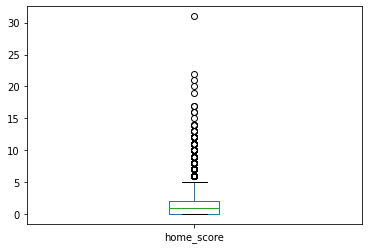

In [71]:
# checking for outliers
rank_final2.home_score.plot(kind ="box")


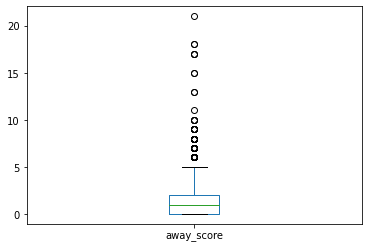

In [72]:
rank_final2.away_score.plot(kind="box")

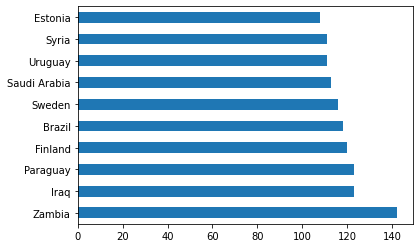

In [73]:
#Checking tournament type value counts
rank_final2.away_team.value_counts().head(10).plot(kind = 'barh')

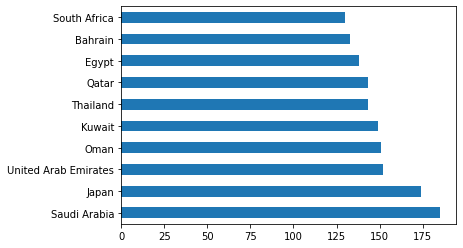

In [74]:
#Checking tournament type value counts
rank_final2.home_team.value_counts().head(10).plot(kind = 'barh')

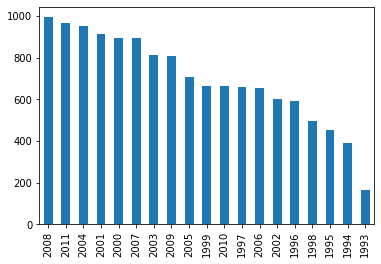

In [75]:
#Checking tournament type value counts
rank_final2.year.value_counts().plot(kind = 'bar')

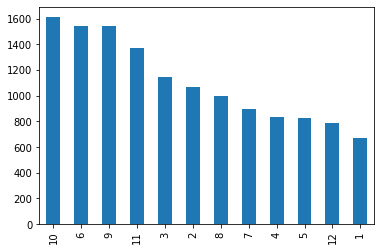

In [76]:
#Checking tournament type value counts
rank_final2.month.value_counts().plot(kind ='bar')

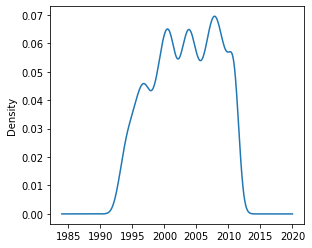

In [77]:
rank_final2['year'].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));


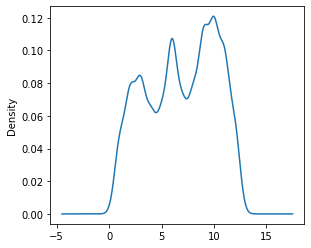

In [78]:
rank_final2['month'].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));


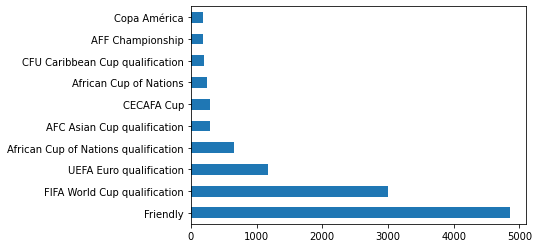

In [79]:
#Checking tournament type value counts
rank_final2.tournament.value_counts().head(10).plot(kind = 'barh')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6045da76a0>],
      dtype=object)

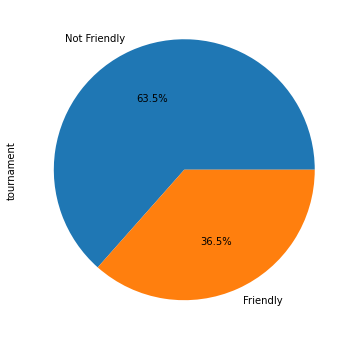

In [80]:
rank_final2.loc[rank_final2.tournament != 'Friendly', 'tournament'] = 'Not Friendly'
rank_final2.tournament.value_counts().plot(kind = 'pie', autopct = '%0.1f%%', figsize = [8, 6],
                                       subplots = True)

In [81]:
Most Number of World Cup Winning Title
Number of Goal Per Countary
Attendance, Number of Teams, Goals, and Matches per Cup
Goals Per Team Per World Cup
Matches With Heihest Number Of Attendance
Stadium with Highest Average Attendance
Which countries had won the cup ?
Number of goal per country
Match outcome by home and away temas

SyntaxError: ignored

## 7. Implementing the Solution

In [ ]:
# Implementing the Solution
# 

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?